In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
df = pd.read_csv('data/dataset_filtered.csv')



In [44]:
df.columns

trainCols = ['RH2M', 'T2M', 'PS', 'PRECTOTCORR_SUM', 'cld', 'pet']
# , 'ALLSKY_SFC_SW_DWN'
dfTransform = df[trainCols]
dfTransform.columns

scaler = StandardScaler()
scaledDF = scaler.fit_transform(dfTransform)
scaledDF[:5]


array([[ 0.52896376, -0.25476651,  0.54257538,  0.48711465,  0.84291   ,
        -0.92321427],
       [ 0.51771699, -0.25050524,  0.542789  ,  0.46904043,  0.84291   ,
        -0.92321427],
       [ 0.52093035, -0.25902778,  0.54287364,  0.46465593,  0.83830271,
        -0.9055552 ],
       [ 0.53217712, -0.27234427,  0.54203932,  0.40556711,  0.38489329,
        -0.8954643 ],
       [ 0.56913081, -0.26195741,  0.55292177,  0.70470819,  0.68192659,
        -0.925737  ]])

4


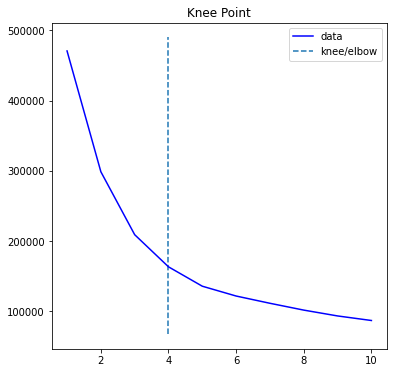

In [45]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaledDF)
    sse.append(kmeans.inertia_)

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(kl.elbow)
kl.plot_knee()

In [46]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

kmeans = KMeans(n_clusters=kl.elbow, **kmeans_kwargs)
kmeans.fit(scaledDF)

df['cluster'] = kmeans.labels_

df.to_csv('r_output/kmeansclustering.csv', index=False)




In [52]:
kmeans.n_iter_

62

In [53]:
kmeans.n_features_in_

6

In [55]:
# kmeans.feature_names_in_

AttributeError: 'KMeans' object has no attribute 'feature_names_in_'

C:\Users\Definitive\AppData\Local\Temp\ipykernel_21240\2507583106.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  m.pcolormesh(lons, lats, npGrid, latlon=True, cmap='jet', snap=True)


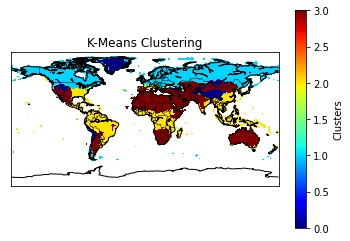

In [47]:
import numpy as np
from mpl_toolkits.basemap import Basemap

def getColorMeshData(currDf, targetVar):
    dfDict = dict()
    # get unique latitudes and longitudes in df
    for index, row in currDf.iterrows():
        lat = row['lat']
        lon = row['lon']
        if lat not in dfDict:
            dfDict[lat] = dict()
        dfDict[lat][lon] = row[targetVar]


    lat = float(-90)
    lats = np.linspace(-90, 90, 180*2 + 1)
    lons = np.linspace(-180, 180, 360*2 + 1)

    arr = []
    for lat in lats:
        currRow = []
        for lon in lons:
            if lat in dfDict and lon in dfDict[lat]:
                # currRow.append(1)
                currRow.append(dfDict[lat][lon])
            else:
                currRow.append(np.NaN)
        arr.append(currRow)

    return lons, lats, np.ma.masked_equal(np.array(arr), np.NaN)

def draw_map():
    m = Basemap()
    lons, lats, npGrid = getColorMeshData(df, 'cluster')
    # draw a shaded-relief image
    m.drawcoastlines()
    m.drawcountries()

    lons, lats = np.meshgrid(lons, lats)
    m.pcolormesh(lons, lats, npGrid, latlon=True, cmap='jet', snap=True)
    plt.title("K-Means Clustering")
    plt.colorbar(label=r'Clusters')

draw_map()